In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support.ui import Select
# from selenium.webdriver.support.ui import WebDriverWait

In [3]:
# driver = webdriver.Chrome()
# driver.get('https://www.nifc.gov/fireInfo/fireInfo_stats_totalFires.html')

In [4]:
# fire = driver.find_element_by_tag_name('tbody')
# print(fire)

In [5]:
# fire.text

In [6]:
# rows = fire.find_elements_by_tag_name('tr')[3:-1]
# table = []
# for row in rows:
#     annual_fires = {}
#     annual_fires['year'] = row.find_elements_by_tag_name('td')[0].text
#     print(annual_fires['year'])
#     annual_fires['fires'] = row.find_elements_by_tag_name('td')[1].text
#     print(annual_fires['fires'])
#     annual_fires['acres'] = row.find_elements_by_tag_name('td')[2].text
#     print(annual_fires['acres'])
#     print("Scraping next row")
#     table.append(annual_fires)

In [7]:
# df = pd.DataFrame(table)
# df.head(100)

In [8]:
# df.dtypes

In [9]:
# df.to_csv("annual_fires.csv", index=False)

In [10]:
# df.year = df.year.astype('int', inplace=True)
# df.dtypes

In [11]:
# df.acres = df.acres.str.replace(',', '')

In [12]:
# df.acres = df.acres.str.replace('*', '')

In [13]:
# df.acres = df.acres.astype('int', inplace=True)
# df.dtypes

In [14]:
# df.fires = df.fires.str.replace(',', '').astype('int', inplace=True)
# df.dtypes

In [15]:
# df.to_csv("annual_fires.csv", index=False)

In [16]:
df = pd.read_csv("annual_fires.csv")

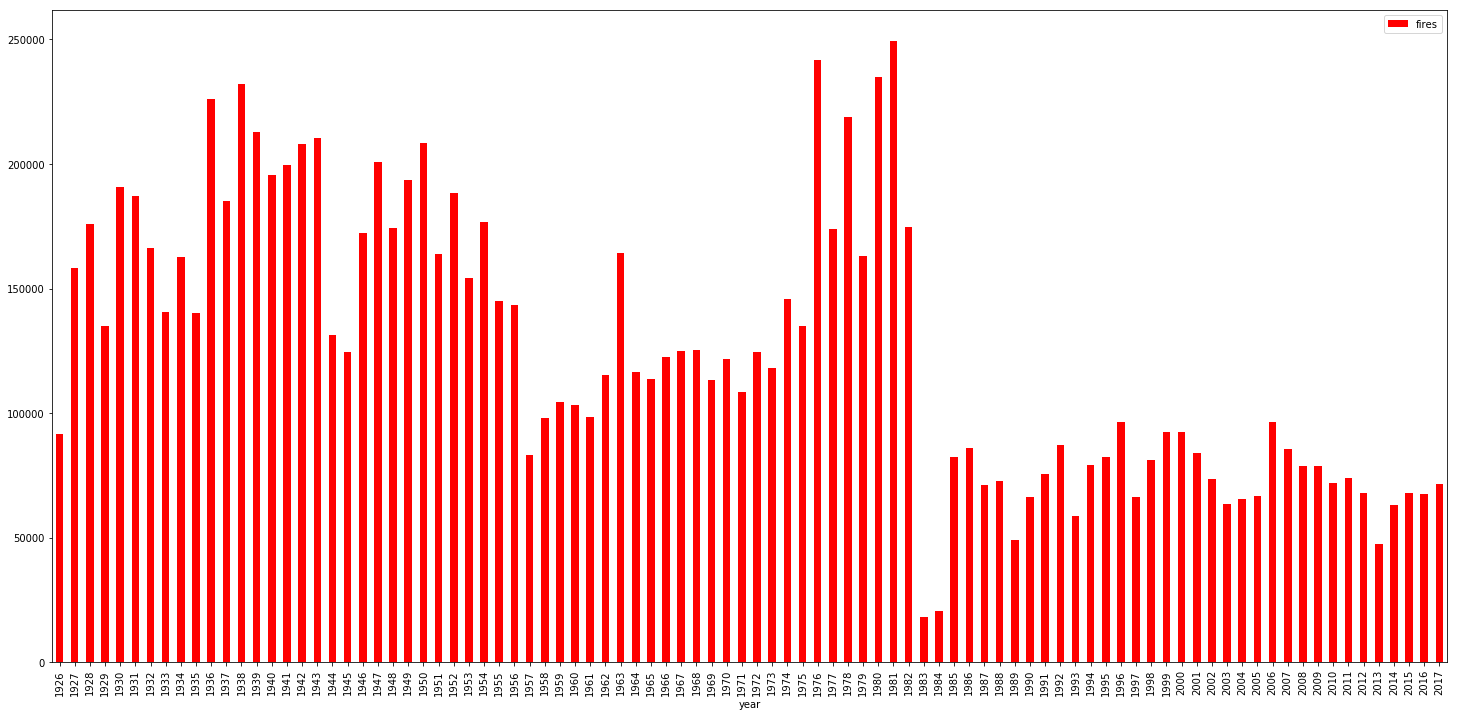

In [17]:
df.sort_values(by=['year']).plot(x='year', y='fires', kind='bar', figsize=(25,12), color='red')

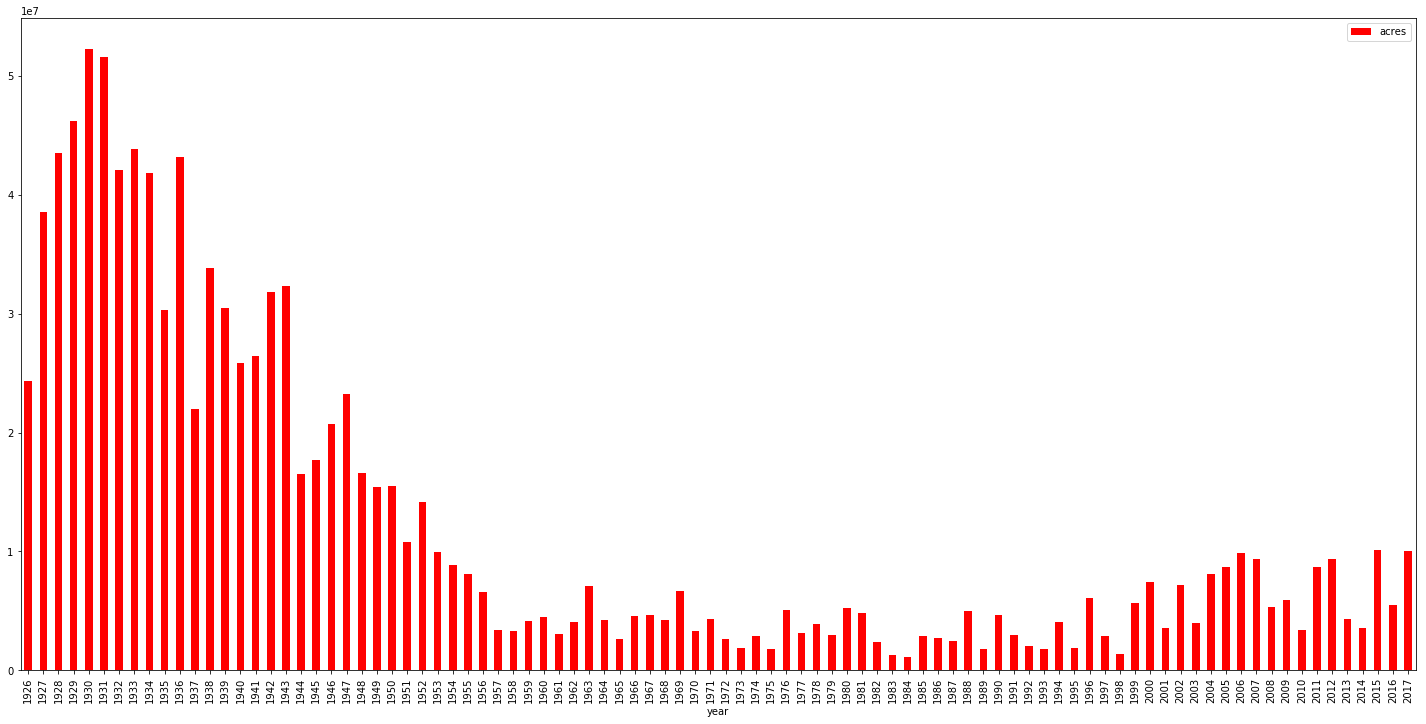

In [18]:
df.sort_values(by=['year']).plot(x='year', y='acres', kind='bar', figsize=(25,12), color='red')

These trends are NOT at all what one would expect! However there's a note with the data that data collection was not standardized until 1983, so anything before that should not be compared to the rest of the data. There's an interesting story here on why historical data is so off. But, for now, to graph post-1983 data

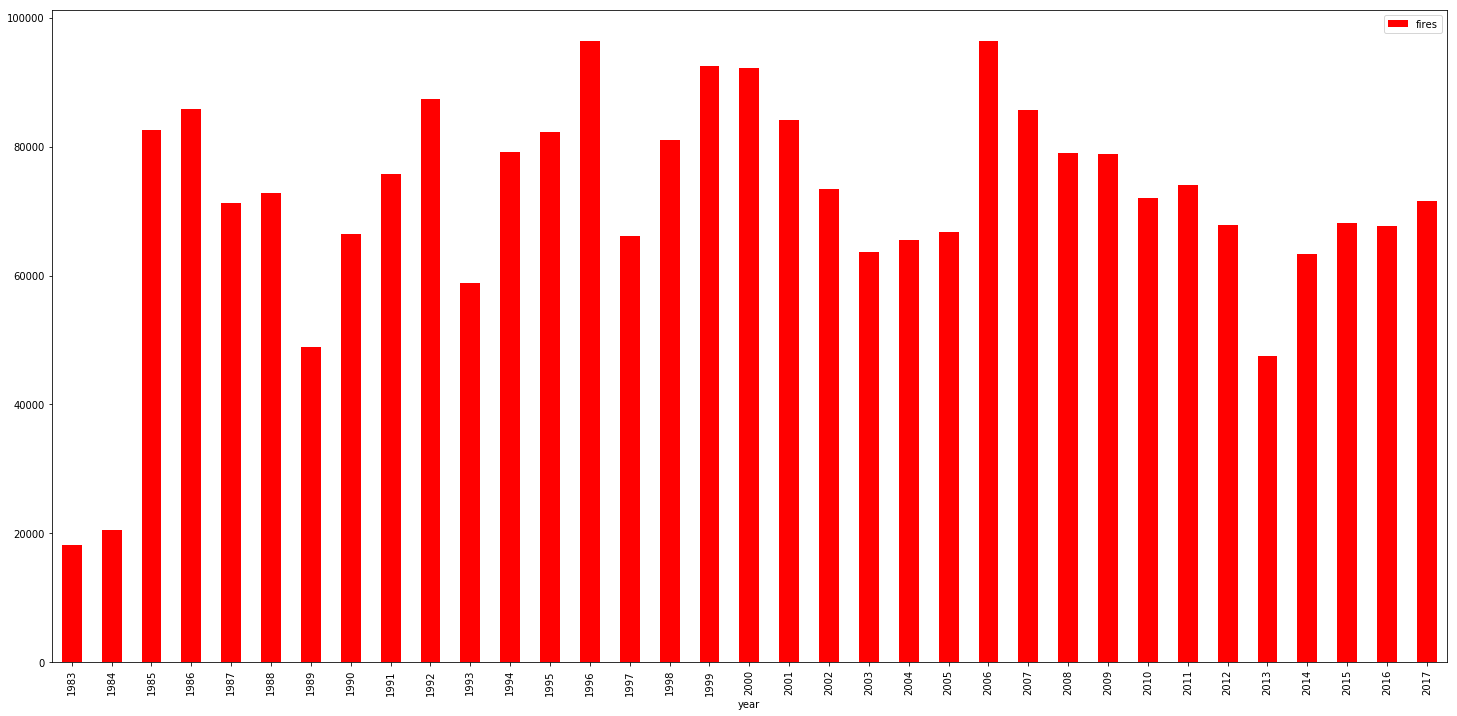

In [19]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='fires', kind='bar', figsize=(25,12), color='red')

There we go! That's the trend we were expecting...

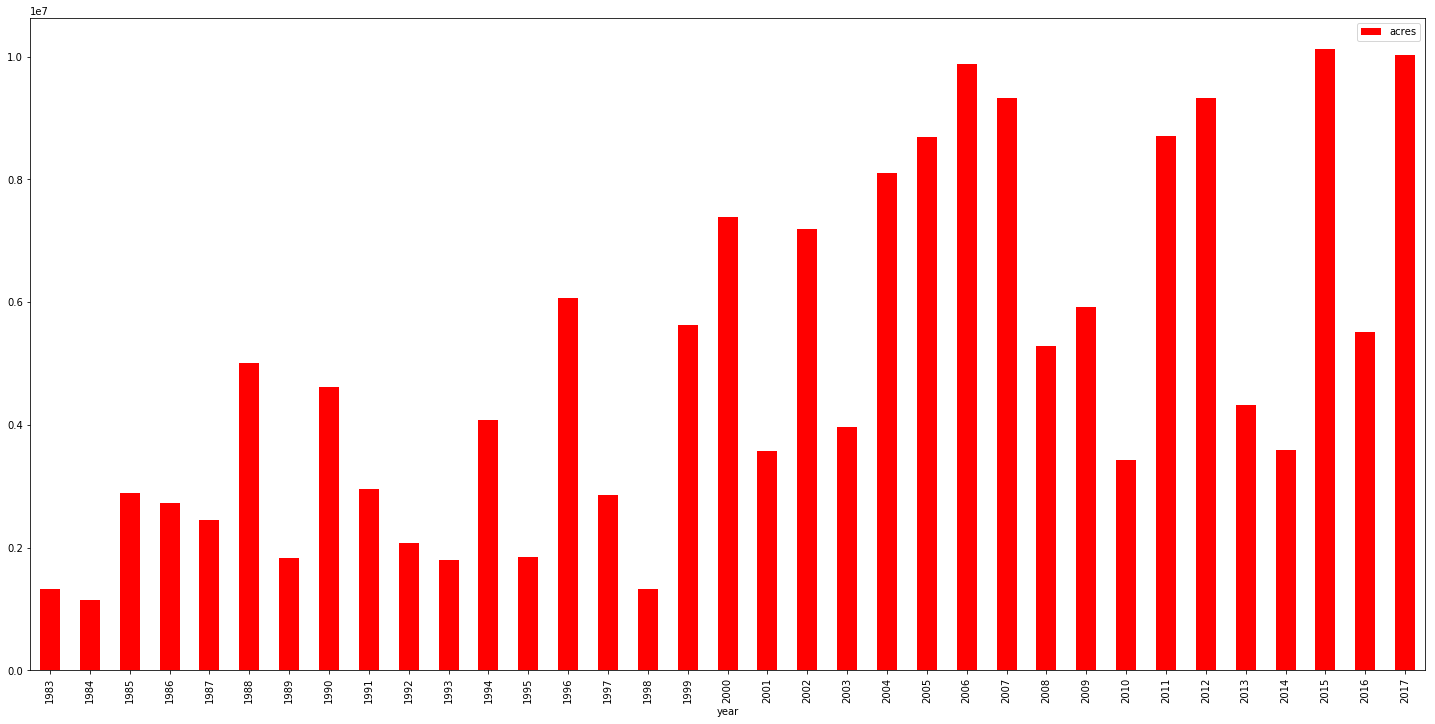

In [20]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='acres', kind='bar', figsize=(25,12), color='red')

In [21]:
df['avg_acres'] = df.acres / df.fires

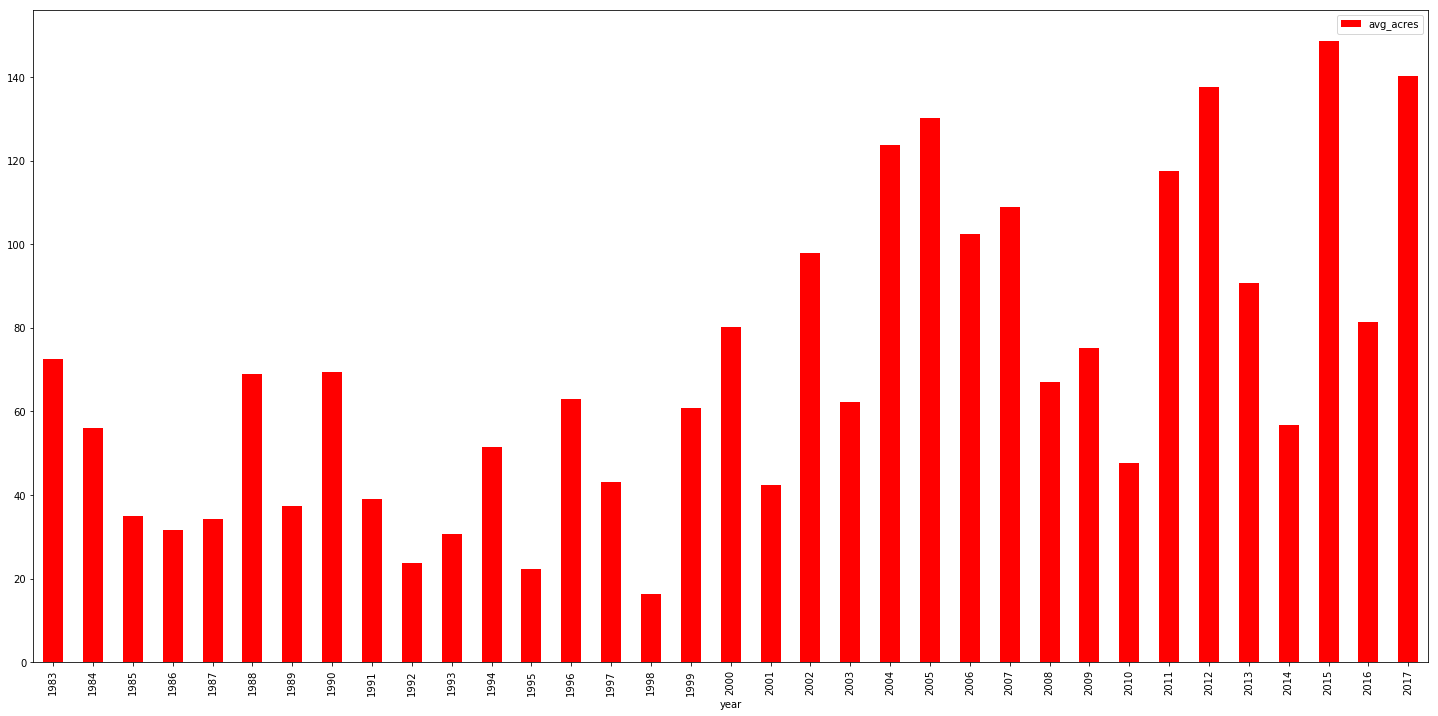

In [22]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='avg_acres', kind='bar', figsize=(25,12), color='red')

In [23]:
# driver = webdriver.Chrome()
# driver.get('https://www.nifc.gov/fireInfo/fireInfo_stats_lgFires.html')

In [24]:
# fire = driver.find_element_by_tag_name('tbody')
# print(fire)

In [25]:
# fire.text

In [26]:
# rows = fire.find_elements_by_tag_name('tr')[1:]
# table = []
# for row in rows:
#     sig_fires = {}
#     sig_fires['year'] = row.find_elements_by_tag_name('td')[0].text
#     print(sig_fires['year'])
#     sig_fires['fire_name'] = row.find_elements_by_tag_name('td')[1].text
#     print(sig_fires['fire_name'])
#     sig_fires['location'] = row.find_elements_by_tag_name('td')[2].text
#     print(sig_fires['location'])
#     sig_fires['state'] = row.find_elements_by_tag_name('td')[3].text
#     print(sig_fires['state'])
#     sig_fires['acres'] = row.find_elements_by_tag_name('td')[4].text
#     print(sig_fires['acres'])
#     print("Scraping next row")
#     table.append(sig_fires)

In [27]:
# df = pd.DataFrame(table)
# df.head()

In [28]:
# df.to_csv("significant_fires.csv", index=False)
# df.head()

In [29]:
# df.year = df.year.astype('int', inplace=True)
# df.dtypes

In [30]:
# df.acres = df.acres.str.replace(',', '')
# df.acres = df.acres.str.replace('.', '')
# df.acres = df.acres.astype('int', inplace=True)

In [31]:
# df.dtypes

In [32]:
# df.to_csv("significant_fires.csv", index=False)

In [33]:
df2 = pd.read_csv("significant_fires.csv")

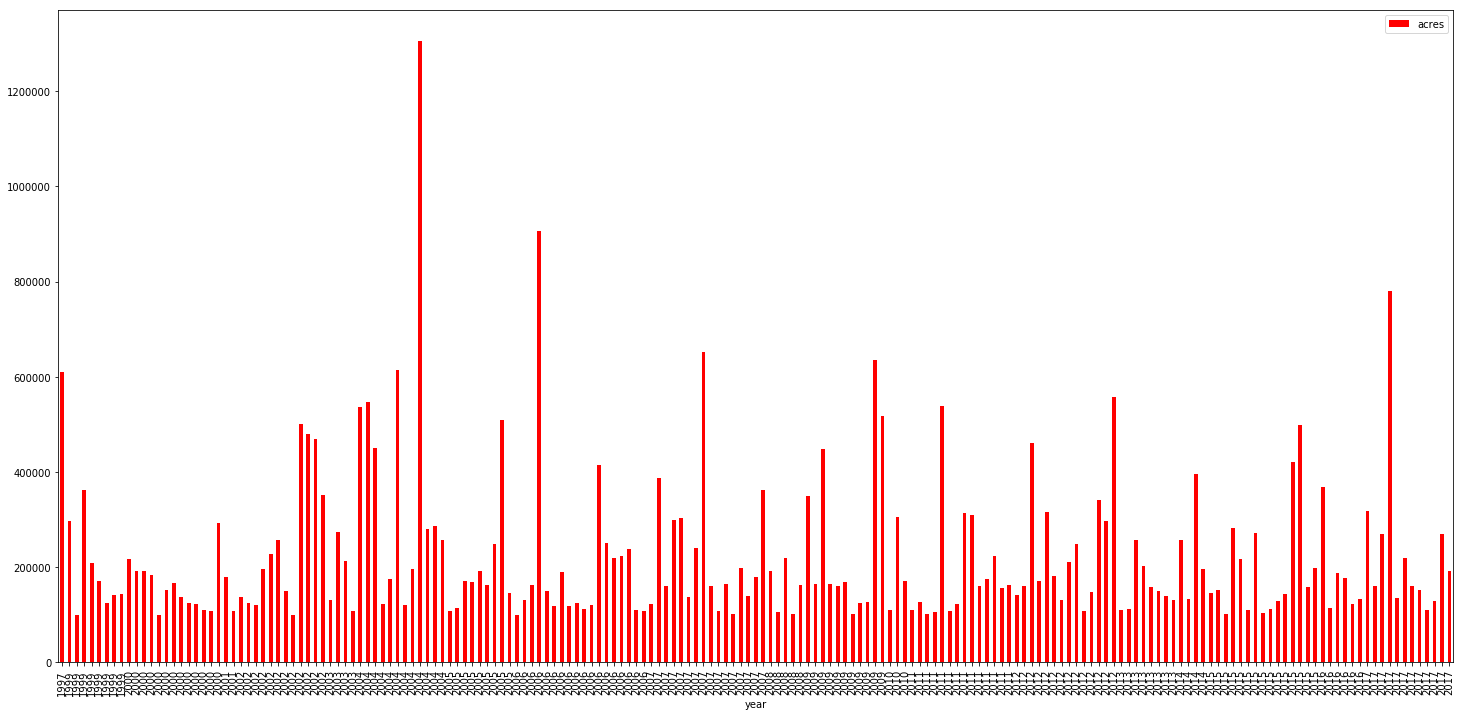

In [34]:
df2.sort_values(by=['year']).plot(x='year', y='acres', kind='bar', figsize=(25,12), color='red')

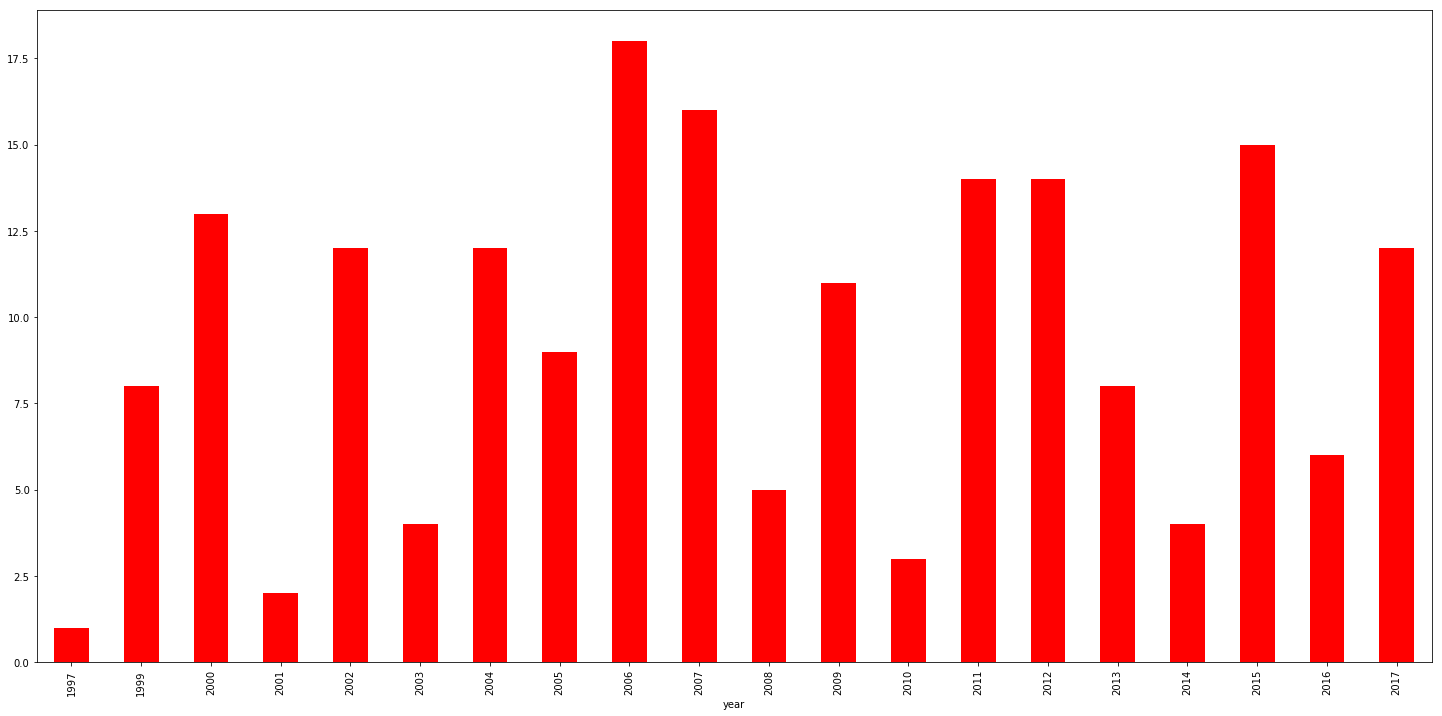

In [35]:
df2.groupby("year").acres.value_counts().unstack().reset_index().fillna(0).plot(x='year',kind='bar', stacked=True, legend=None, figsize=(25,12), color='red')


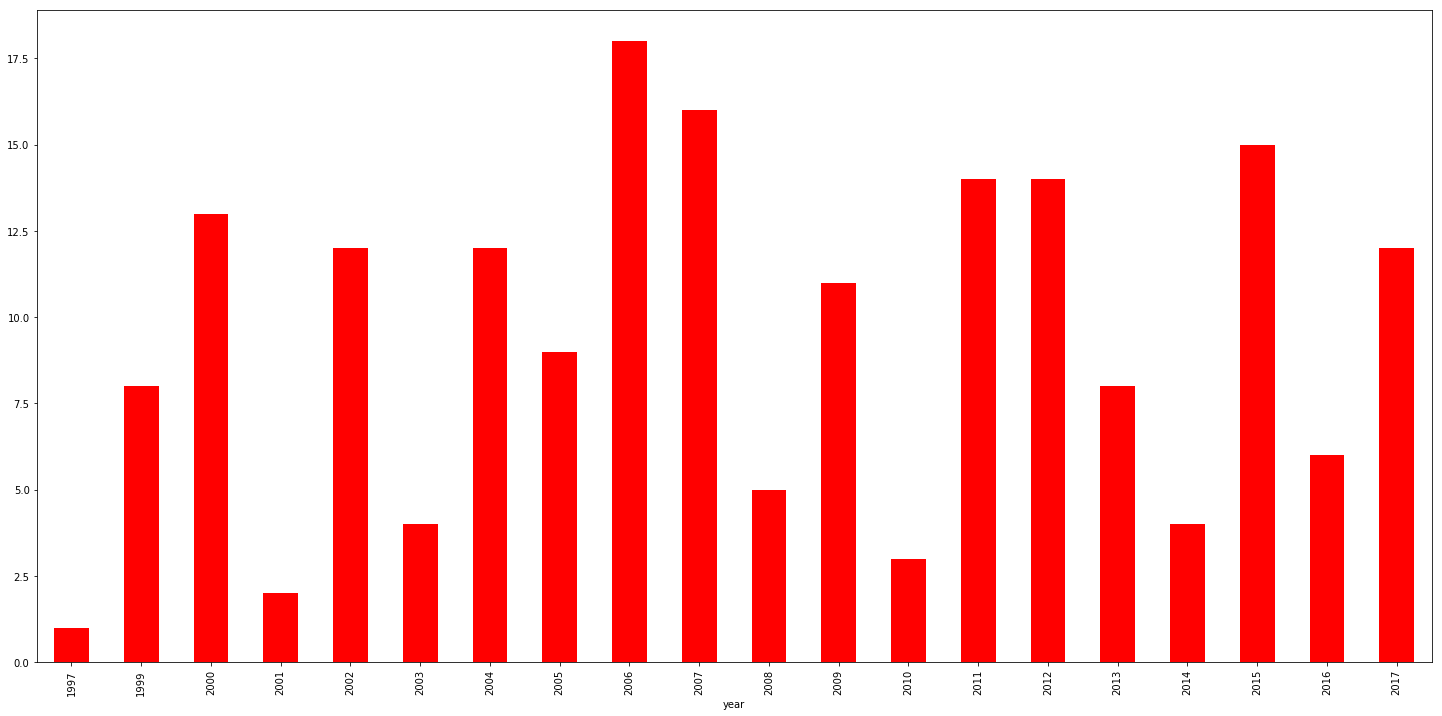

In [36]:
df2.groupby("year").fire_name.value_counts().unstack().reset_index().fillna(0).plot(x='year',kind='bar', stacked=True, legend=None, figsize=(25,12), color='red')

In [37]:
df.head()

,acres,fires,year,avg_acres
0,10026086,71499,2017,140.226940
1,5509995,67743,2016,81.336743
2,10125149,68151,2015,148.569339
3,3595613,63312,2014,56.791967
4,4319546,47579,2013,90.786818


In [38]:
df3 = pd.read_csv("nino_years.csv")

In [39]:
df3.head()

,AMJ,ASO,DJF,FMA,JAS,JFM,JJA,MAM,MJJ,NDJ,OND,SON,year,yr_avg
0,-1.1,-0.4,-1.5,-1.2,-0.4,-1.3,-0.5,-1.2,-0.9,-0.8,-0.6,-0.4,1950,-0.858333
1,0.4,1.0,-0.8,-0.2,0.9,-0.5,0.7,0.2,0.6,0.8,1.0,1.2,1951,0.441667
2,0.2,0.2,0.5,0.3,0.0,0.4,-0.1,0.3,0.0,0.1,0.0,0.1,1952,0.166667
3,0.8,0.8,0.4,0.6,0.7,0.6,0.7,0.7,0.8,0.8,0.8,0.8,1953,0.708333
4,-0.5,-0.9,0.8,0.0,-0.8,0.5,-0.6,-0.4,-0.5,-0.7,-0.7,-0.8,1954,-0.383333


In [40]:
df3

,AMJ,ASO,DJF,FMA,JAS,JFM,JJA,MAM,MJJ,NDJ,OND,SON,year,yr_avg
0,-1.1,-0.4,-1.5,-1.2,-0.4,-1.3,-0.5,-1.2,-0.9,-0.8,-0.6,-0.4,1950,-0.858333
1,0.4,1.0,-0.8,-0.2,0.9,-0.5,0.7,0.2,0.6,0.8,1.0,1.2,1951,0.441667
2,0.2,0.2,0.5,0.3,0.0,0.4,-0.1,0.3,0.0,0.1,0.0,0.1,1952,0.166667
3,0.8,0.8,0.4,0.6,0.7,0.6,0.7,0.7,0.8,0.8,0.8,0.8,1953,0.708333
4,-0.5,-0.9,0.8,0.0,-0.8,0.5,-0.6,-0.4,-0.5,-0.7,-0.7,-0.8,1954,-0.383333
5,-0.8,-1.1,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.7,-1.5,-1.7,-1.4,1955,-0.950000
6,-0.5,-0.5,-1.1,-0.6,-0.6,-0.8,-0.6,-0.5,-0.5,-0.4,-0.4,-0.4,1956,-0.575000
7,0.9,1.3,-0.2,0.4,1.3,0.1,1.3,0.7,1.1,1.7,1.5,1.4,1957,0.958333
8,0.7,0.4,1.8,1.3,0.4,1.7,0.6,0.9,0.6,0.6,0.5,0.4,1958,0.825000
9,0.2,-0.1,0.6,0.5,-0.3,0.6,-0.2,0.3,-0.1,0.0,0.0,0.0,1959,0.125000


In [41]:
#I'm not proud of this
df3.drop([0,1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30, 31 ,32], inplace=True)

In [42]:
df3 = df3.reset_index()
df3

,index,AMJ,ASO,DJF,FMA,JAS,JFM,JJA,MAM,MJJ,NDJ,OND,SON,year,yr_avg
0,33,1.1,-0.5,2.2,1.5,-0.1,1.9,0.3,1.3,0.7,-0.9,-1.0,-0.8,1983,0.475000
1,34,-0.5,-0.2,-0.6,-0.3,-0.2,-0.4,-0.3,-0.4,-0.4,-1.1,-0.9,-0.6,1984,-0.491667
2,35,-0.8,-0.4,-1.0,-0.8,-0.5,-0.8,-0.5,-0.8,-0.6,-0.4,-0.3,-0.3,1985,-0.600000
3,36,-0.1,0.7,-0.5,-0.3,0.4,-0.5,0.2,-0.2,0.0,1.2,1.1,0.9,1986,0.241667
4,37,1.0,1.6,1.2,1.1,1.7,1.2,1.5,0.9,1.2,1.1,1.3,1.5,1987,1.275000
5,38,-0.9,-1.2,0.8,0.1,-1.1,0.5,-1.3,-0.3,-1.3,-1.8,-1.8,-1.5,1988,-0.816667
6,39,-0.6,-0.2,-1.7,-1.1,-0.3,-1.4,-0.3,-0.8,-0.4,-0.1,-0.2,-0.2,1989,-0.608333
7,40,0.3,0.4,0.1,0.3,0.4,0.2,0.3,0.3,0.3,0.4,0.4,0.3,1990,0.308333
8,41,0.5,0.6,0.4,0.2,0.6,0.3,0.7,0.3,0.6,1.5,1.2,0.8,1991,0.641667
9,42,1.1,-0.1,1.7,1.5,0.1,1.6,0.4,1.3,0.7,-0.1,-0.3,-0.2,1992,0.641667


In [43]:
plt.rcdefaults()
plt.rcParams.update({
    'lines.linewidth': 3,
    'legend.frameon' : False,
    'legend.borderaxespad' : 0,
    'axes.labelcolor' : 'black',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.grid': False,
    'axes.titlepad' : 20,
    'axes.labelpad' : 5,
    'axes.edgecolor': 'white',
    'lines.solid_capstyle': 'round',
    'patch.linewidth': 0,
    'xtick.major.size': 10,
    'xtick.minor.size': 10,
    'ytick.major.size': 10,
    'ytick.minor.size': 10,
    'xtick.color' : 'black', 
    'ytick.color' : 'black',
    'font.size': 16.0,
    'font.serif' : 'Times New Roman',
    'font.family' : 'serif',
    'savefig.bbox' : 'tight',
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.07,
    'svg.fonttype': 'path',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

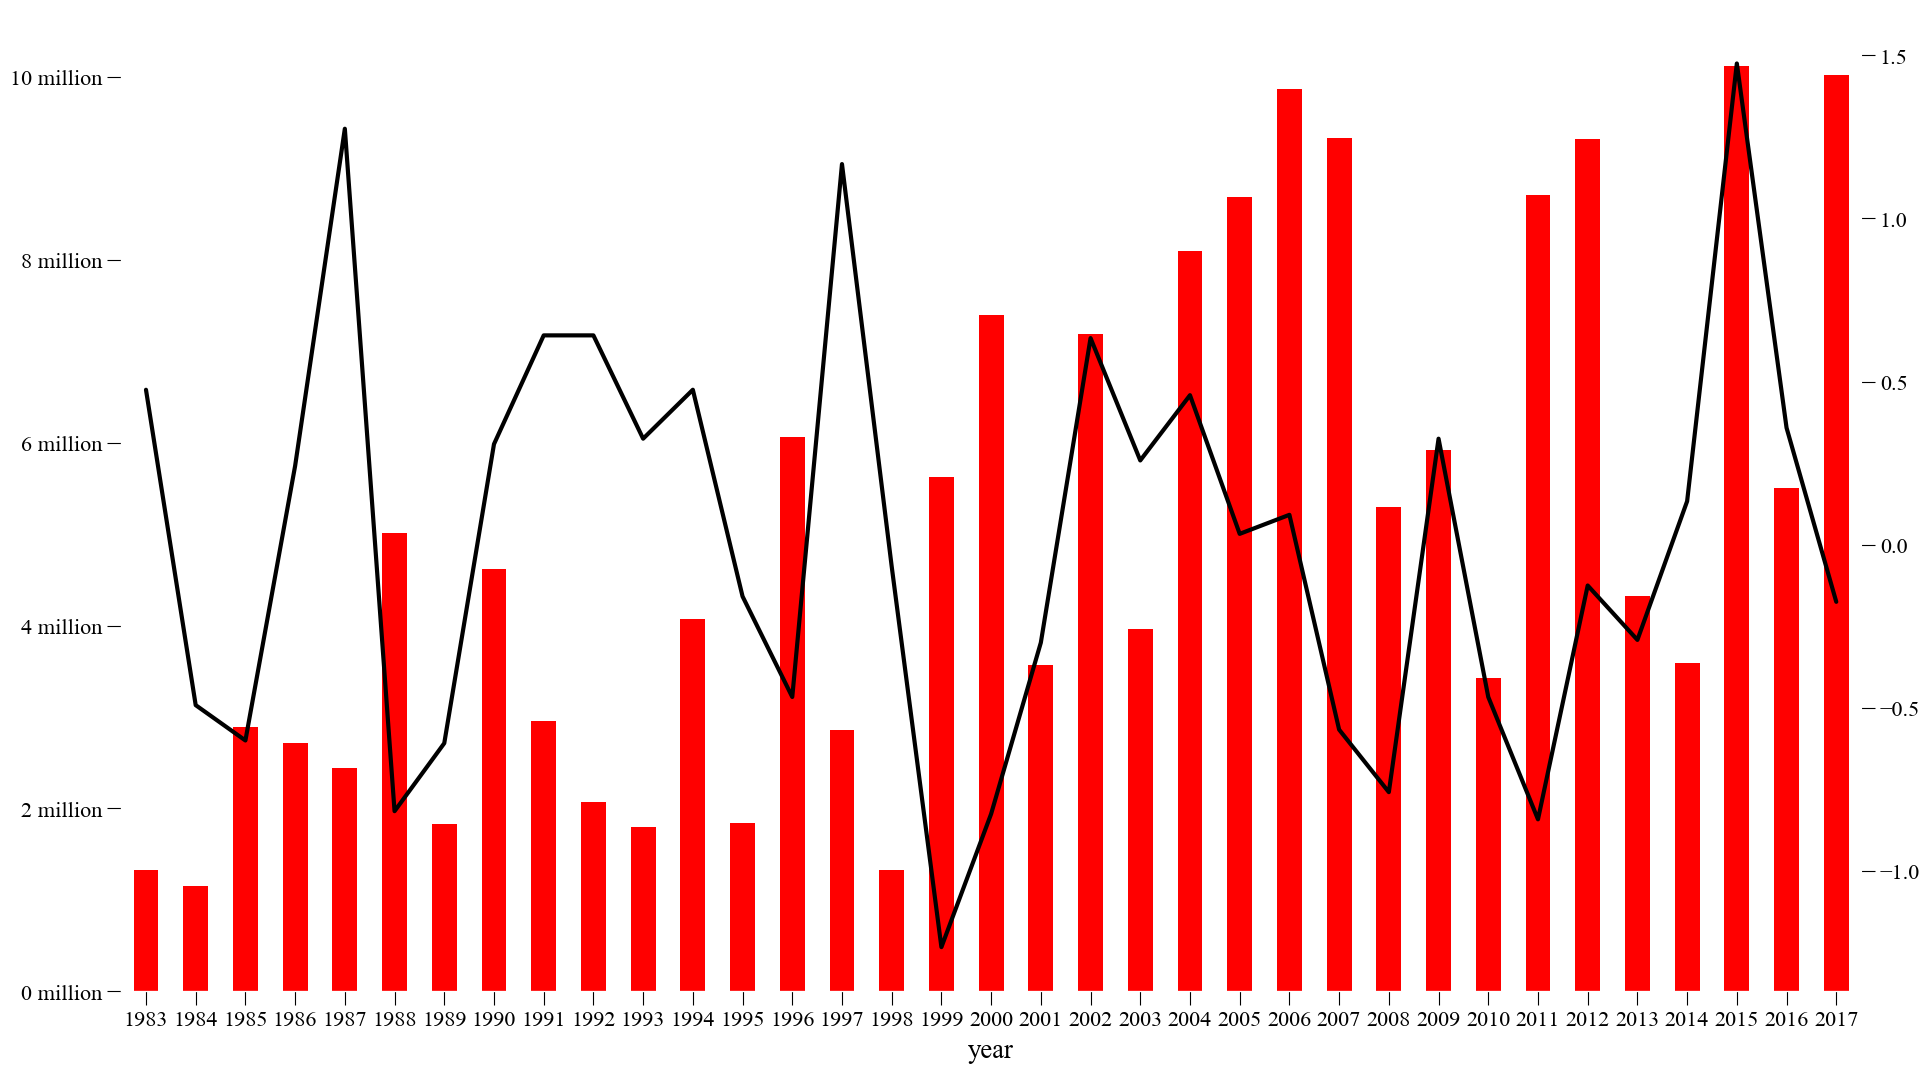

In [47]:
plt.rcParams.update({
    'axes.formatter.limits': [-20, 20]
})

from matplotlib.ticker import FuncFormatter

# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    millions = int(value / 1000000)
    return "{} million".format(millions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df.sort_values(by=['year']).tail(35).plot(x='year', y='acres', kind='bar', figsize=(25,12), legend=None, color='red', rot=0, ax=ax0)
df3.plot(kind='line',y='yr_avg',figsize=(20,12),legend=False, secondary_y=True, ax=ax1, color='black')

ax0.yaxis.set_major_formatter(formatter)

plt.savefig("fire-01.pdf")
plt.show()
plt.close()


In [48]:
rainfall = pd.read_csv("annual_rainfall.csv")

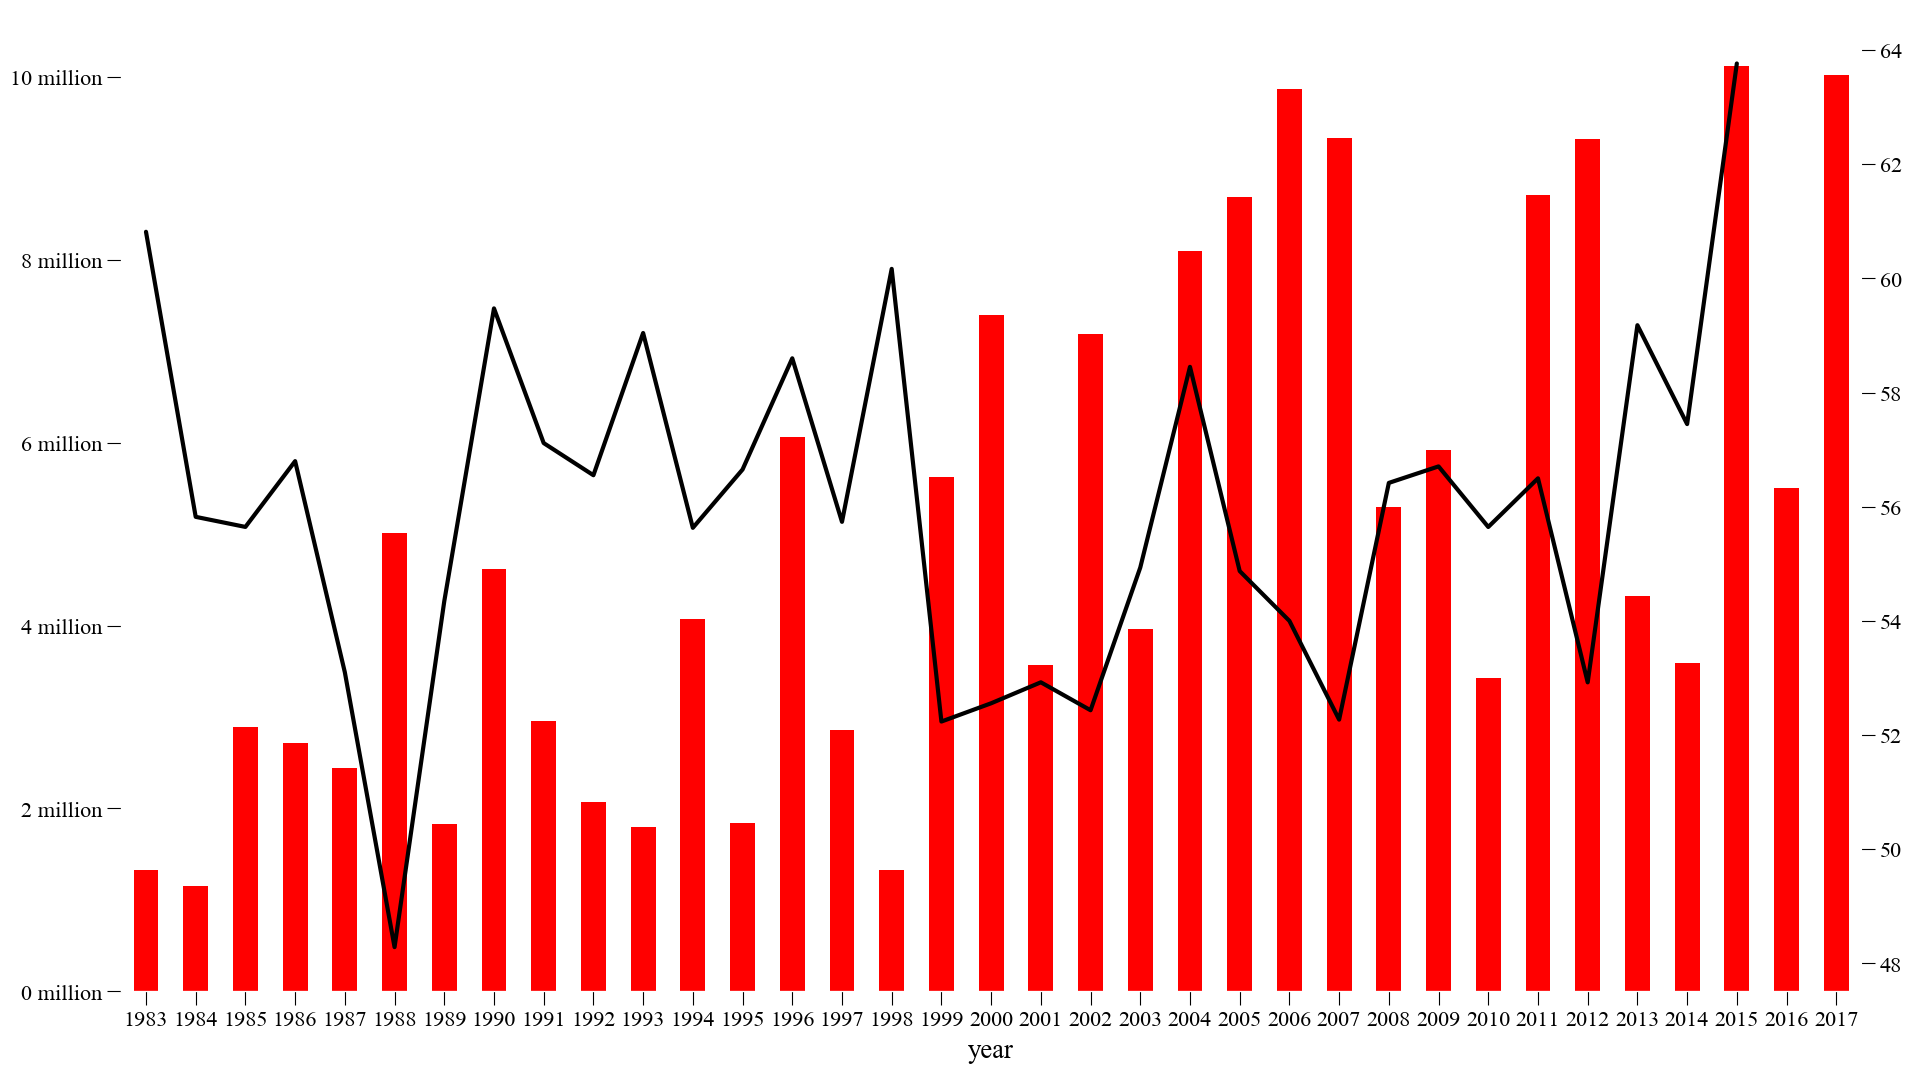

In [53]:
plt.rcParams.update({
    'axes.formatter.limits': [-20, 20]
})

from matplotlib.ticker import FuncFormatter

# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    millions = int(value / 1000000)
    return "{} million".format(millions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df.sort_values(by=['year']).tail(35).plot(x='year', y='acres', kind='bar', figsize=(25,12), legend=None, color='red', rot=0, ax=ax0)
rainfall.plot(y='pr',figsize=(20,12),legend=False, secondary_y=True, ax=ax1, color='black')

ax0.yaxis.set_major_formatter(formatter)

plt.savefig("fire-02.pdf")
plt.show()
plt.close()

In [54]:
temp = pd.read_csv("annual_temp.csv")

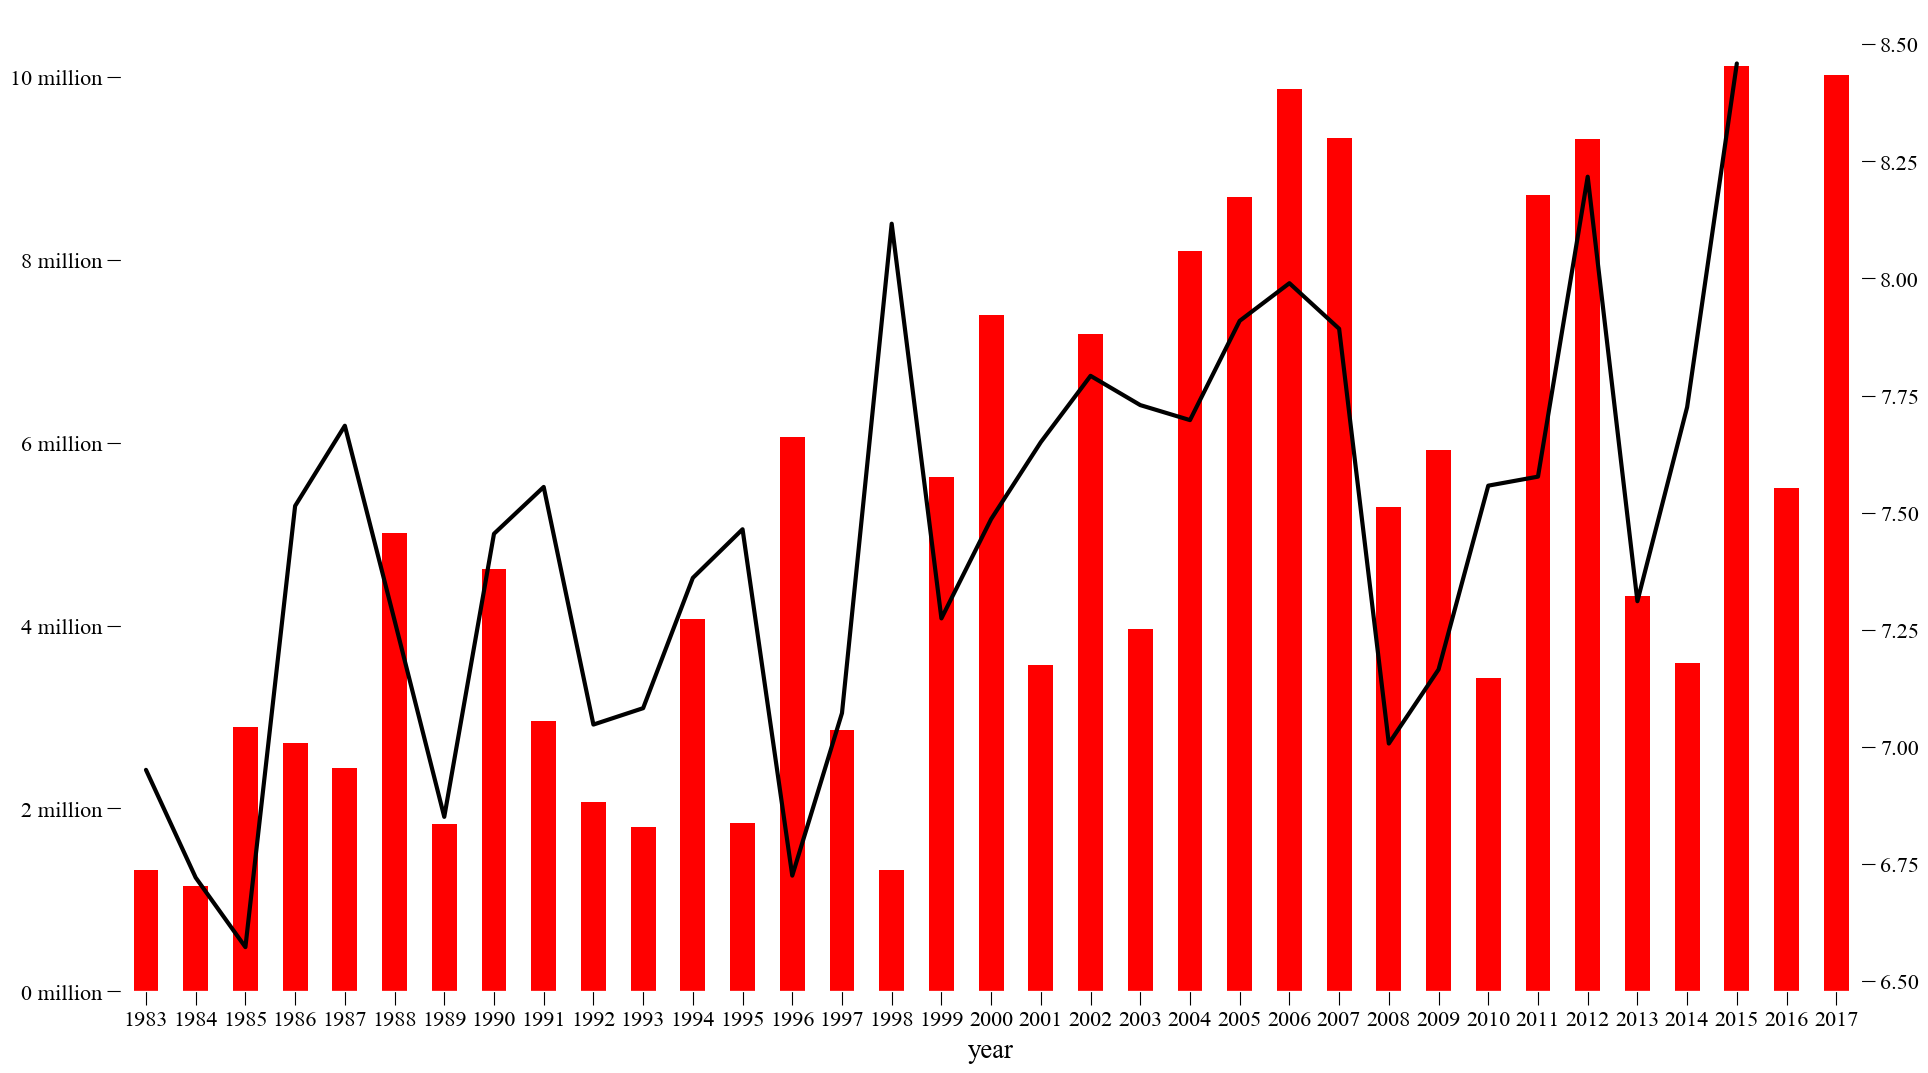

In [55]:
plt.rcParams.update({
    'axes.formatter.limits': [-20, 20]
})

from matplotlib.ticker import FuncFormatter

# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    millions = int(value / 1000000)
    return "{} million".format(millions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df.sort_values(by=['year']).tail(35).plot(x='year', y='acres', kind='bar', figsize=(25,12), legend=None, color='red', rot=0, ax=ax0)
temp.plot(y='tas',figsize=(20,12),legend=False, secondary_y=True, ax=ax1, color='black')

ax0.yaxis.set_major_formatter(formatter)

plt.savefig("fire-03.pdf")
plt.show()
plt.close()